In [15]:
# Dependency imports 
import pandas as pd
import numpy as np
import wrapt
import itertools
import scipy.stats as ss
from statsmodels.discrete.discrete_model import NegativeBinomial
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD
import warnings
warnings.filterwarnings('ignore')


In [28]:
# Data imports
df = pd.read_csv('Weekly_leak_time_series.csv')

In [36]:
df = df.rename(columns={"waterleak_count": "UWL_calls", "Reticulaton_leak_calls":"water_leak_calls"}).drop(['valveleak_calls'], axis=1)

# Preliminary dataframe checks

In [37]:
df.head()

,Date,meterleak_calls,pipeleak_calls,UWL_calls,water_leak_calls,actual_water_leaks,actual_meter_leaks
0,2018-07-01,0,0,0,0,7,3
1,2018-07-08,1,0,0,1,6,2
2,2018-07-15,5,4,3,13,6,3
3,2018-07-22,2,1,0,3,7,1
4,2018-07-29,3,1,3,7,8,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Date                  50 non-null object
meterleak_calls       50 non-null int64
pipeleak_calls        50 non-null int64
valveleak_calls       50 non-null int64
UWL_calls             50 non-null int64
water_leak_calls      50 non-null int64
actual_water_leaks    50 non-null int64
actual_meter_leaks    50 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.2+ KB


In [32]:
# Date to date timeobject and indexing the dataframe on the datetime object
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index(df["Date"],inplace=True)

In [33]:
df.describe()

,meterleak_calls,pipeleak_calls,valveleak_calls,UWL_calls,water_leak_calls,actual_water_leaks,actual_meter_leaks
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.520000,1.16000,0.040000,1.120000,3.840000,6.060000,3.140000
std,1.417673,1.28349,0.197949,1.479658,2.720744,1.219066,1.714405
min,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.000000,0.00000,0.000000,0.000000,2.000000,5.000000,2.000000
50%,1.000000,1.00000,0.000000,1.000000,4.000000,6.000000,3.000000
75%,2.000000,2.00000,0.000000,2.000000,5.000000,7.000000,5.000000
max,5.000000,6.00000,1.000000,6.000000,13.000000,9.000000,8.000000


# Explorary data analysis

## Visualizations

### Time series plots

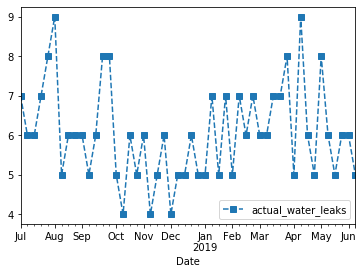

In [34]:
series = df[['Date','actual_water_leaks']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

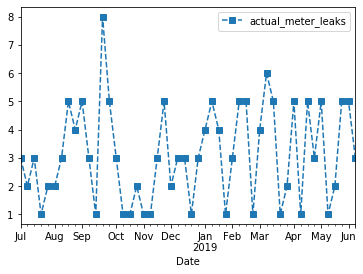

In [35]:
series = df[['Date','actual_meter_leaks']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

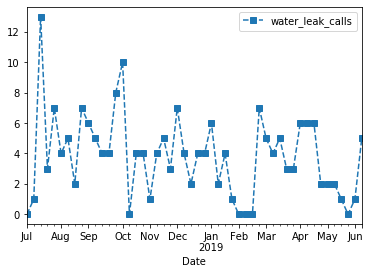

In [38]:
series = df[['Date','water_leak_calls']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

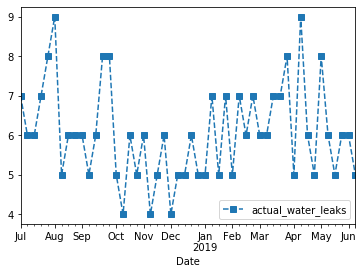

In [39]:
series = df[['Date','actual_water_leaks']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

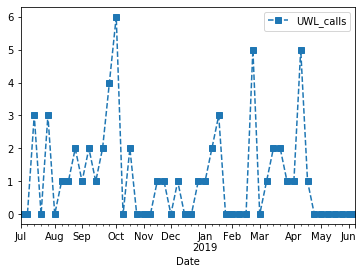

In [40]:
series = df[['Date','UWL_calls']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

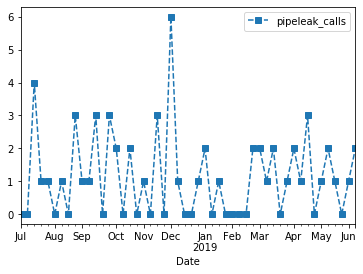

In [41]:
series = df[['Date','pipeleak_calls']]
#series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

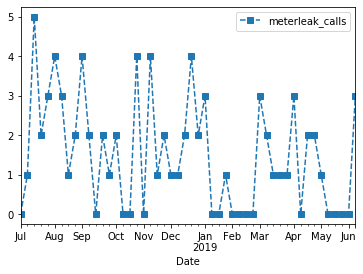

In [43]:
series = df[['Date','meterleak_calls']]
series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date')
series.plot(ls='--',marker='s')
plt.show()

### Leak count distribution

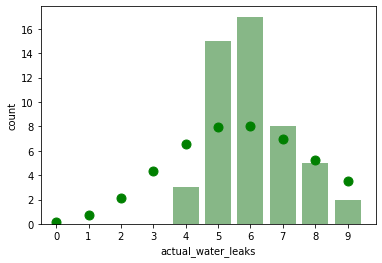

In [45]:
# Actual  Water leaks
x_awl = np.arange(df.actual_water_leaks.max()+1)
m_awl = df.actual_water_leaks.mean()
sns.countplot(df.actual_water_leaks, order=x_awl, color='g', alpha=0.5)
plt.plot(x_awl, ss.poisson.pmf(x_awl, m_awl)*len(df.actual_meter_leaks), 'go', markersize=9)

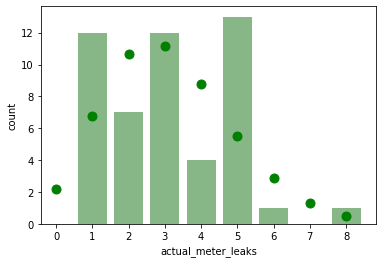

In [46]:
# Actual  Meter leaks
x_aml = np.arange(df.actual_meter_leaks.max()+1)
m_aml = df.actual_meter_leaks.mean()
sns.countplot(df.actual_meter_leaks, order=x_aml, color='g', alpha=0.5)
plt.plot(x_aml, ss.poisson.pmf(x_aml, m_aml)*len(df.actual_meter_leaks), 'go', markersize=9)

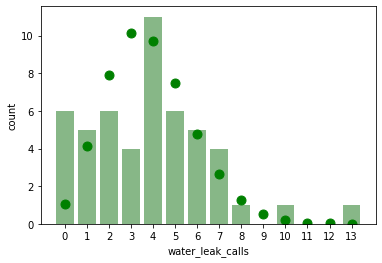

In [48]:
# Water leak calls
x_wlc = np.arange(df.water_leak_calls.max()+1)
m_wlc = df.water_leak_calls.mean()
sns.countplot(df.water_leak_calls, order=x_wlc, color='g', alpha=0.5)
plt.plot(x_wlc, ss.poisson.pmf(x_wlc, m_wlc)*len(df.water_leak_calls), 'go', markersize=9)

In [49]:
df.columns

Index(['Date', 'meterleak_calls', 'pipeleak_calls', 'UWL_calls',
       'water_leak_calls', 'actual_water_leaks', 'actual_meter_leaks'],
      dtype='object')

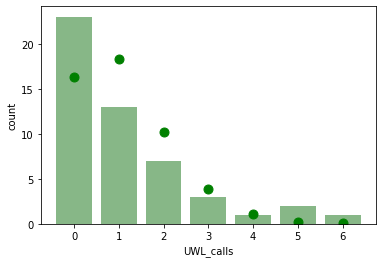

In [50]:
# Unspecified Water leak calls
x_uwlc = np.arange(df.UWL_calls.max()+1)
m_uwlc = df.UWL_calls.mean()
sns.countplot(df.UWL_calls, order=x_uwlc, color='g', alpha=0.5)
plt.plot(x_uwlc, ss.poisson.pmf(x_uwlc, m_uwlc)*len(df.UWL_calls), 'go', markersize=9)

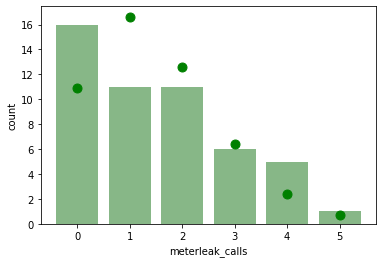

In [51]:
# Meter leak calls
x_mlc = np.arange(df.meterleak_calls.max()+1)
m_mlc = df.meterleak_calls.mean()
sns.countplot(df.meterleak_calls, order=x_mlc, color='g', alpha=0.5)
plt.plot(x_mlc, ss.poisson.pmf(x_mlc, m_mlc)*len(df.meterleak_calls), 'go', markersize=9)

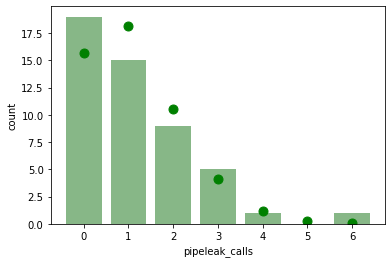

In [52]:
# Pipe leak calls
x_plc = np.arange(df.pipeleak_calls.max()+1)
m_plc = df.pipeleak_calls.mean()
sns.countplot(df.pipeleak_calls, order=x_plc, color='g', alpha=0.5)
plt.plot(x_plc, ss.poisson.pmf(x_plc, m_plc)*len(df.pipeleak_calls), 'go', markersize=9)

In [ ]:
#use subplots here includes each variable as a subplot

### scatter for variable relationships

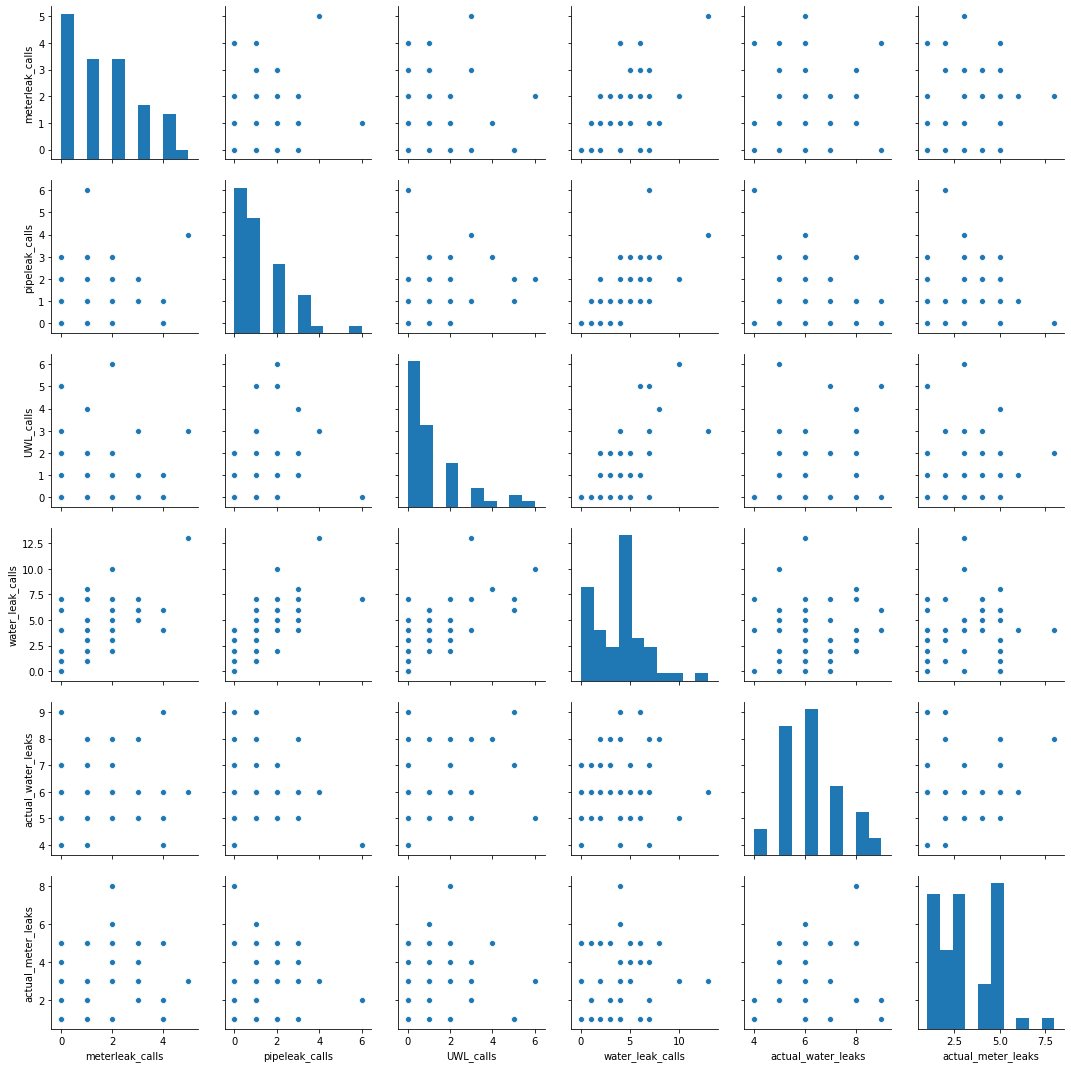

In [93]:
scatters = sns.pairplot(df)

### kernel density plot for variable relationships

### statistical tests for variable relationships using kendal tau measure

In [59]:
corrMatrix = df.corr(method='kendall')

In [61]:
corrMatrix

,meterleak_calls,pipeleak_calls,UWL_calls,water_leak_calls,actual_water_leaks,actual_meter_leaks
meterleak_calls,1.000000,0.064109,0.030497,0.439949,-0.127629,0.072526
pipeleak_calls,0.064109,1.000000,0.356725,0.601932,-0.076982,0.008470
UWL_calls,0.030497,0.356725,1.000000,0.553056,0.203368,0.129507
water_leak_calls,0.439949,0.601932,0.553056,1.000000,-0.031537,0.039454
actual_water_leaks,-0.127629,-0.076982,0.203368,-0.031537,1.000000,0.095364
actual_meter_leaks,0.072526,0.008470,0.129507,0.039454,0.095364,1.000000


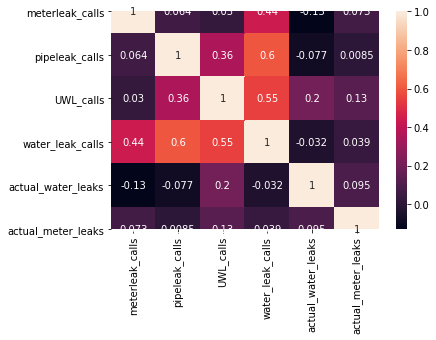

In [60]:
sns.heatmap(corrMatrix, annot=True)

In [92]:
# computing Kendals p-values for columns in the dataframe
tau_pvalues = np.zeros((len(df.columns[1:]),len(df.columns[1:]))) 
for rw in range(len(df.columns[1:])): # we are slicing the columns to remove the Date from iterations
    for cl in range(len(df.columns[1:])):
        tau_pv = ss.kendalltau(df[df.columns[1:][rw]],df[df.columns[1:][cl]])[1]
        tau_pv = round(tau_pv,3)
        tau_pvalues[rw][cl] = tau_pv
tau_pvalues = pd.DataFrame(tau_pvalues, index= df.columns[1:], columns=df.columns[1:])
tau_pvalues

,meterleak_calls,pipeleak_calls,UWL_calls,water_leak_calls,actual_water_leaks,actual_meter_leaks
meterleak_calls,0.000,0.587,0.797,0.000,0.274,0.529
pipeleak_calls,0.587,0.000,0.003,0.000,0.517,0.943
UWL_calls,0.797,0.003,0.000,0.000,0.088,0.272
water_leak_calls,0.000,0.000,0.000,0.000,0.779,0.722
actual_water_leaks,0.274,0.517,0.088,0.779,0.000,0.411
actual_meter_leaks,0.529,0.943,0.272,0.722,0.411,0.000


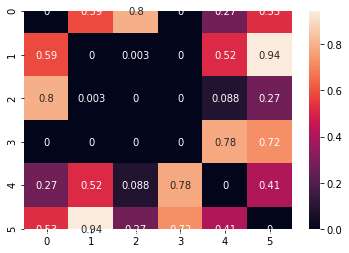

In [87]:
#corrMatrix = df.corr()
sns.heatmap(tau_pvalues, annot=True)

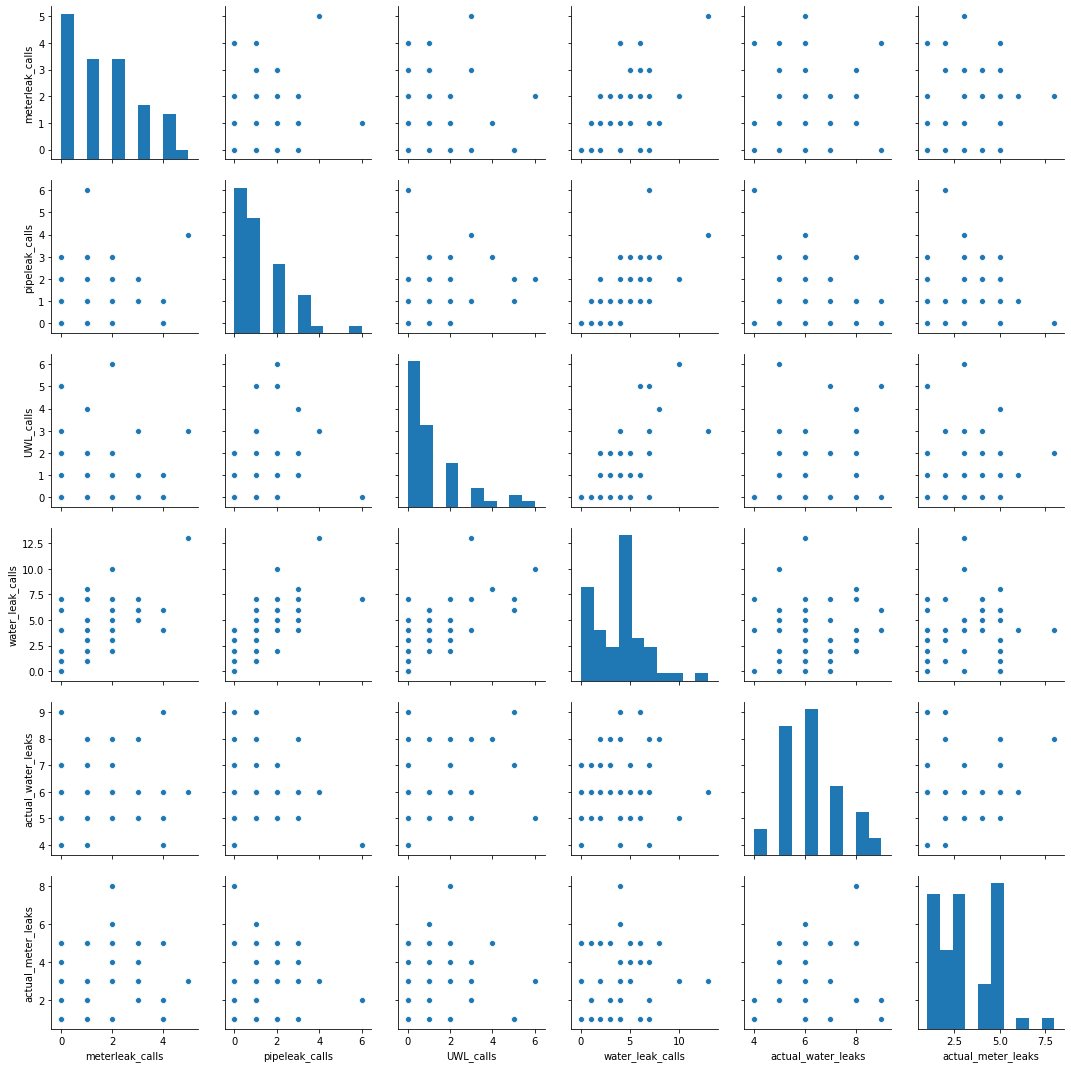

# Inference Model development

In [55]:
# Separating independent variables(predictors) and the target (dependant) variable
X_t = df[['meterleak_calls', 'pipeleak_calls', 'waterleak_count',  'Reticulaton_leak_calls' ]]#,'Temp_range_disc', 'Avg_Temp_disc','Rain_disc']]
y_t = df[['actual_water_leaks', 'actual_meter_leaks']]

In [56]:
#Spliting the train and test sets on a 70:30 basis
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size = .2)

In [58]:
# Joining the train set for model development
X_train[['actual_water_leaks', 'actual_meter_leaks']] = y_train

In [59]:
#data = pd.DataFrame(data={'A': [0, 0, 1], 'B': [0, 1, 0], 'C': [1, 1, 0]})
# defining the models
trans_model = BayesianModel([('meterleak_calls', 'actual_meter_leaks'),('meterleak_calls', 'Reticulaton_leak_calls'), ('pipeleak_calls', 'Reticulaton_leak_calls'), ('waterleak_count', 'Reticulaton_leak_calls'), ('Reticulaton_leak_calls','actual_water_leaks'), ('actual_meter_leaks', 'actual_water_leaks')]) #, ('Temp_range_disc', 'meterleak_count'), ('Rain_disc', 'meterleak_count') ])
trans_model.fit(X_train)
#model1.get_cpds()

In [60]:
X_test.head()

,meterleak_calls,pipeleak_calls,waterleak_count,Reticulaton_leak_calls
28,0,1,3,4
14,0,0,0,0
6,1,0,1,2
31,0,0,0,0
4,4,0,0,4


In [61]:
# Alligning test set with data model variables "Picking only the observed variables so as to predict the latent ones"
X_test = X_test[['meterleak_calls','pipeleak_calls', 'waterleak_count', 'Reticulaton_leak_calls']]#,'actual_meter_leaks' ]] #'Temp_range_disc','Rain_disc']]

In [62]:
X_test.head()

,meterleak_calls,pipeleak_calls,waterleak_count,Reticulaton_leak_calls
28,0,1,3,4
14,0,0,0,0
6,1,0,1,2
31,0,0,0,0
4,4,0,0,4


In [63]:
# Using fitted model to obtain predictions based on test set
y_pred_meterleak_trans = trans_model_meterleak.predict(X_test)
#y_pred_meterleak2 = model_meterleak2.predict(X_test_ml)

In [69]:
y_pred_meterleak_trans.actual_water_leaks

28    6
14    4
6     6
31    4
4     6
8     6
36    7
15    6
25    5
37    6
Name: actual_water_leaks, dtype: int64

In [70]:
#glued.head()
# Measuring the accuracy of the models based on the test set
print(accuracy_score(y_pred_meterleak_trans.actual_water_leaks, y_test.actual_water_leaks))

0.6


In [71]:
print(accuracy_score(y_pred_meterleak_trans.actual_meter_leaks, y_test.actual_meter_leaks))

0.5


In [54]:
y_pred_meterleak_trans

,actual_water_leaks,actual_meter_leaks
4,6,1
29,6,5
40,5,1
0,6,5
32,4,1
23,5,3
9,5,3
12,5,5
11,5,3
27,6,1


In [ ]:
# Printing a CPD with it's state names defined.
print(trans_model_meterleak.get_cpds('Rain_disc_t'))

# Inference

In [ ]:
# Making inference
meterleak_infer = VariableElimination(trans_model_meterleak)
prob_G = meterleak_infer.query(variables=['meterleak_count'])

In [ ]:
print(prob_G['meterleak_count'])

In [ ]:
# Inference with evidence
prob_Ge = meterleak_infer.query(['Rain_disc_t'], evidence={ 'meterleak_count': 2}) 

In [ ]:
print(prob_Ge['Rain_disc_t'])

In [ ]:
# Print state with maximum probability
print(meterleak_infer.map_query(['meterleak_count'], evidence={'meterleak_count_t': 2, 'Rain_disc_t': 1}) )

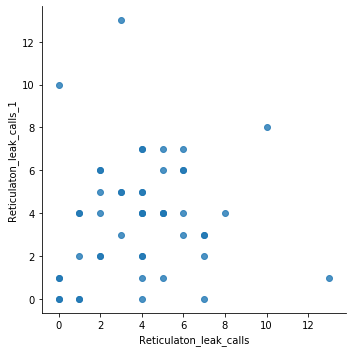

In [13]:
# warming up with a scatter plot ( audience rating vs critic rating)
sp = sns.lmplot(data = df, x = 'Reticulaton_leak_calls', y = 'Reticulaton_leak_calls_1', fit_reg = False)# hue = 'Genre', size = 5, aspect = 1)

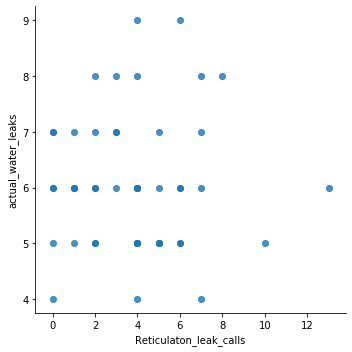

In [6]:
# warming up with a scatter plot ( audience rating vs critic rating)
sp = sns.lmplot(data = df, x = 'Reticulaton_leak_calls', y = 'actual_water_leaks', fit_reg = False)# hue = 'Genre', size = 5, aspect = 1)

In [7]:
 from pgmpy.base import DAG

ImportError: cannot import name 'DAG'